In [1]:
# Let's generate some linear-looking data:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

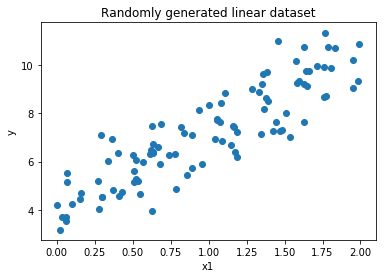

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Randomly generated linear dataset")
plt.show()

In [3]:
# Add x0 = 1 to each instance of X
X_b = np.c_[np.ones((100, 1)), X]

In [4]:
# Let's calculate the theta using normal equation using inv() function from the Numpy's Linear Algebra module.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# Let's see what the equation found:
theta_best

# Originally the equation used 4 and 3 but we got 4.12 and 2.95 approx. Close enough because noise make it 
# impossible to recover the exact parameters of the original function.

array([[4.09148627],
       [3.12650647]])

In [6]:
# Now we can make predictions using the generated theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.09148627],
       [10.34449922]])

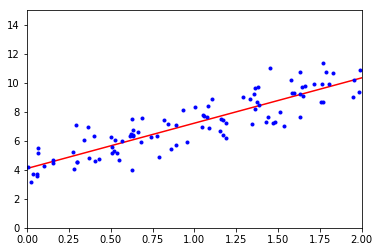

In [7]:
# Let's plot this model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# The equivalnet code using Scikit-Learn looks like this:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # intercept_ is the bias term and coef_ is the feature weights here

(array([4.09148627]), array([[3.12650647]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.09148627],
       [10.34449922]])

In [10]:
# Now let's look at a quick implementation of Gradient Descent algorithm
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
# Now let's look at the results
theta

array([[4.09148627],
       [3.12650647]])

In [12]:
# Now let's look at a quick implementation of Stochastic Gradient Descent algorithm
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
# By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient
# Descent code iterated 1,000 times through the whole training set, this code goes through the training set 
# only 50 times and reaches as fairly good solution

In [13]:
theta

array([[4.08844868],
       [3.12156938]])

In [14]:
# The equivalnet code using Scikit-Learn looks like this:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel())

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [15]:
# Now let's look at the results
theta

array([[4.08844868],
       [3.12156938]])

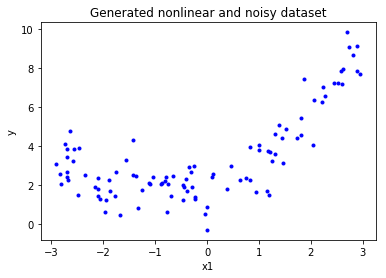

In [16]:
# To see polynomial regression working, let's generate some nonlinear data, based on a simple quadratic equation
# (plus some noise)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Generated nonlinear and noisy dataset")
plt.show()

In [17]:
# Clearly a straight line will never fit this data properly. So let's use Scikit-Learn's PolynomialFeatures class
# to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as
# new features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.80898997])

In [18]:
X_poly[0]

# X_poly now contains the original feature of X plus the square of this feature.

array([2.80898997, 7.89042463])

In [19]:
# Now you can fit a LinearRegression model to this extended training data:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9677775]), array([[0.88873186, 0.48616808]]))

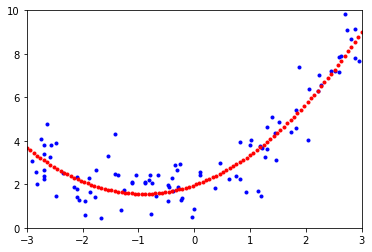

In [20]:
# Let's predict using this model and plot this model's prediction
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r.", linewidth=2)
plt.axis([-3, 3, 0, 10])

plt.show()

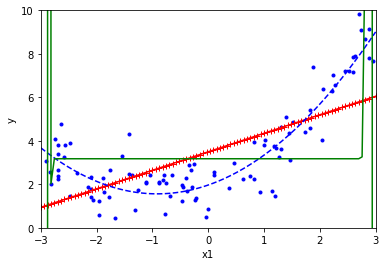

In [21]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit_transform(X)
# LinearRegression with degree 1
lin_reg_deg1 = LinearRegression()
lin_reg_deg1.fit(X, y)
y_predict_deg1 = lin_reg_deg1.predict(X_new)

# LinearRegression with degree 2
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features_2.fit_transform(X)
lin_reg_deg2 = LinearRegression()
lin_reg_deg2.fit(X_poly_2, y)
X_new_poly_2 = poly_features_2.fit_transform(X_new)
y_predict_deg2 = lin_reg_deg2.predict(X_new_poly_2)

# LinearRegression with degree 300
poly_features_300 = PolynomialFeatures(degree=300, include_bias=False)
X_poly_300 = poly_features_300.fit_transform(X)
lin_reg_deg300 = LinearRegression()
lin_reg_deg300.fit(X_poly_300, y)
X_new_poly_300 = poly_features_300.fit_transform(X_new)
y_predict_deg300 = lin_reg_deg300.predict(X_new_poly_300)

# Let's plot all the prepared models:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict_deg1, "r-+")
plt.plot(X_new, y_predict_deg2, "b--")
plt.plot(X_new, y_predict_deg300, "g-")
plt.axis([-3, 3, 0, 10])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [22]:
# If a model performs well on the training data but generalizes poorly according to the cross-validation metrics,
# then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell
# when a model is too complex or too simple.
# Another way is to look at the learning curves which are plots of the model's performance on the training set
# and the validation set as a function of the training set size.To generate the plots, simply train the model
# several times on differnet sized subsets of the training set. Following code performs the same:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning Curves")
    plt.legend()

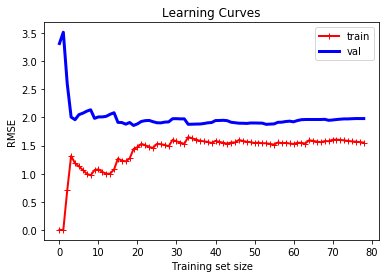

In [23]:
# Let's look at the learning curves of the plain Linear Regression model:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

# Let's have a look at the performance on training set. When there are just one or two instances in the training
# set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added 
# to the training set, it becomes impossible for the model to fit the training data perfectly, because it is not
# linear at all. 
# Now let's look at the performance on the validation set. When the model is trained on a very few instances, it 
# is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the 
# model is shown more training examples, it learns and thus the validation error slowly goes down. 

# These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close 
# and fairly high.

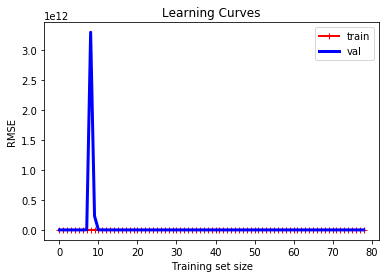

In [24]:
# Now let's look at the learning curves of a 10th-degree polynomial model on the same data:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ))

plot_learning_curve(polynomial_regression, X, y)

# The error on the training data is much lower than with the Linear Regression model.

In [25]:
# To regularize a polynomial model is to reduce the number of polynomial degrees, and regularization in linear
# model is achieved by constraining the weights of the model. Let's implement three different ways to constrain
# the weights.
# First is Redge Regression.
# One way to implement Ridge Regression is:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.76830582]])

In [26]:
# Another way to is to used SGD Regressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

# The penalty hyperparameter set the type of regularization term to use. Specifying l2 indicates that you want SGD
# to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector.

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3.80826521])

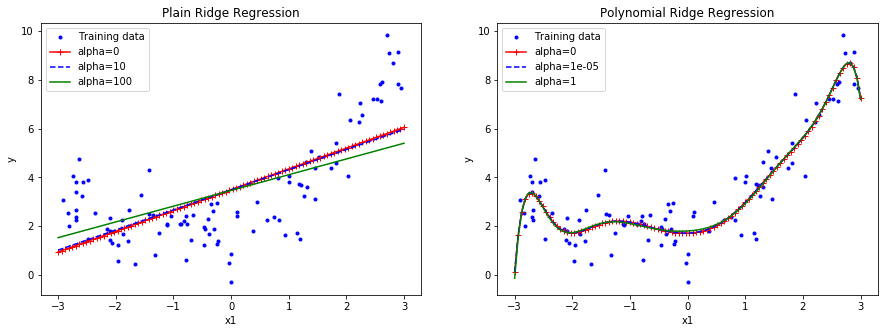

In [27]:
# Given figure shows several Ridge models trained on some linear data using different alpha value. On the left,
# plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using 
# PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the Ridge models are applied
# to the resulting features: this is Polynomial Regression with Ridge regularization
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Plain Ridge Regression")
plt.plot(X, y, "b.")

ridge_reg0 = Ridge(alpha=0, solver="cholesky")
ridge_reg0.fit(X, y)
y_predict0 = ridge_reg0.predict(X_new)
plt.plot(X_new, y_predict0, "r-+")

ridge_reg10 = Ridge(alpha=10, solver="cholesky")
ridge_reg10.fit(X, y)
y_predict10 = ridge_reg10.predict(X_new)
plt.plot(X_new, y_predict10, "b--")

ridge_reg100 = Ridge(alpha=100, solver="cholesky")
ridge_reg100.fit(X, y)
y_predict100 = ridge_reg100.predict(X_new)
plt.plot(X_new, y_predict100, "g-")
plt.legend(["Training data", "alpha=0", "alpha=10", "alpha=100"])

plt.subplot(122)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Polynomial Ridge Regression")
plt.plot(X, y, "b.")

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
std_scaler = StandardScaler()
std_scaler.fit_transform(X_poly)

X_new_poly = poly_features.fit_transform(X_new)
std_scaler.fit_transform(X_new_poly)

ridge_reg_p0 = Ridge(alpha=0, solver="cholesky")
ridge_reg_p0.fit(X_poly, y)
y_predict_p0 = ridge_reg_p0.predict(X_new_poly)
plt.plot(X_new, y_predict_p0, "r-+")

ridge_reg_p5 = Ridge(alpha=1e-05, solver="cholesky")
ridge_reg_p5.fit(X_poly, y)
y_predict_p5 = ridge_reg_p5.predict(X_new_poly)
plt.plot(X_new, y_predict_p5, "b--")

ridge_reg_p1 = Ridge(alpha=1, solver="cholesky")
ridge_reg_p1.fit(X_poly, y)
y_predict_p1 = ridge_reg_p1.predict(X_new_poly)
plt.plot(X_new, y_predict_p1, "g-")
plt.legend(["Training data", "alpha=0", "alpha=1e-05", "alpha=1"])

In [28]:
# Second way to regularize the parameters is to use Lasso Regression model. It is another regularized version of
# Linear Regression: just like RIdge Regression, it adds a regularization term to the cost function, but it uses
# the l1 norm of the weight vector instead of half the square of the l2 norm.
# One way to implement Lasso Regression is:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.71989544])

In [29]:
# Another way to implement is by using SGDClassifier
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3.82409215])

/home/cipher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/li

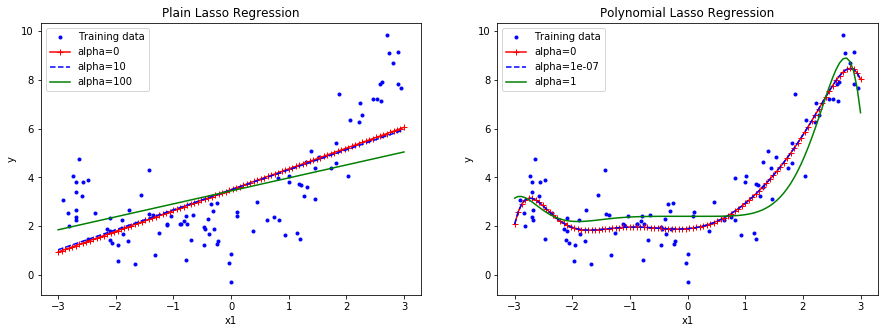

In [30]:
# Given figure shows the same thing as pervious figure but replaces the Ridge models with Lasso models and uses
# smaller alpha values.
# Given figure shows several Ridge models trained on some linear data using different alpha value. On the left,
# plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using 
# PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the Ridge models are applied
# to the resulting features: this is Polynomial Regression with Ridge regularization
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Plain Lasso Regression")
plt.plot(X, y, "b.")

lasso_reg0 = Lasso(alpha=0)
lasso_reg0.fit(X, y)
y_predict0 = lasso_reg0.predict(X_new)
plt.plot(X_new, y_predict0, "r-+")

lasso_reg01 = Lasso(alpha=0.1)
lasso_reg01.fit(X, y)
y_predict01 = lasso_reg01.predict(X_new)
plt.plot(X_new, y_predict01, "b--")

lasso_reg1 = Lasso(alpha=1)
lasso_reg1.fit(X, y)
y_predict1 = lasso_reg1.predict(X_new)
plt.plot(X_new, y_predict1, "g-")
plt.legend(["Training data", "alpha=0", "alpha=10", "alpha=100"])

plt.subplot(122)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Polynomial Lasso Regression")
plt.plot(X, y, "b.")

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
std_scaler = StandardScaler()
std_scaler.fit_transform(X_poly)

X_new_poly = poly_features.fit_transform(X_new)
std_scaler.fit_transform(X_new_poly)

lasso_reg_p0 = Lasso(alpha=0)
lasso_reg_p0.fit(X_poly, y)
y_predict_p0 = lasso_reg_p0.predict(X_new_poly)
plt.plot(X_new, y_predict_p0, "r-+")

lasso_reg_p7 = Lasso(alpha=1e-07)
lasso_reg_p7.fit(X_poly, y)
y_predict_p7 = lasso_reg_p7.predict(X_new_poly)
plt.plot(X_new, y_predict_p7, "b--")

lasso_reg_p1 = Lasso(alpha=1)
lasso_reg_p1.fit(X_poly, y)
y_predict_p1 = lasso_reg_p1.predict(X_new_poly)
plt.plot(X_new, y_predict_p1, "g-")
plt.legend(["Training data", "alpha=0", "alpha=1e-07", "alpha=1"])

In [31]:
# And the third and last one to regualrize the linear regression model is Elastic Net model, which is a mix of both
# Ridge Regression and Lasso Regression, controlled by mix ratio r. When r=0, Elastic Net is equivalent to Ridge 
# Regression, and when r=1, it is equivalent to Lasso Regression.
# Here is a way to implement Elastic Net:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

# Here l1_ratio corresponds to the mix ratio r.

array([4.72460619])

In [32]:
# A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as
# soon as the validation error reaches a minimum. This is called early stopping.
# Here is a basic implementation of early stoppign:
from sklearn.base import clone

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
std_scaler = StandardScaler()
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)
X_val_poly = poly_features.fit_transform(X_val)
X_val_poly_scaled = std_scaler.fit_transform(X_val_poly)
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continue where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
# Note that warm_start=True, when the fit() method is called, it just continues training where it left off instead
# of restarting from scratch.

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/sit

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/sit

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/cipher/anaconda3/lib/python3.7/sit

In [33]:
# To implement a Logistic Regression model let's try to build a classifier on iris dataset. It is a famous dataset
# which contains the sepal and petal length and width of 150 iris flowers of three differnet species: Iris-Setosa,
# Iris-Versicolor, and Iris-Virginica.
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [80]:
# Let's load the petal width and target variable as Iris-Virginica
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [99]:
# Now let's train a Logistic Regression model:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
# The Logistic Regression model can be generalized to support multiple classes directly, without having to train 
# and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.
X = iris["data"][:, (2, 3)] # petal length, petal width
y= iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
# So let's find an iris with 5 cm long and 2 cm wide petals.
softmax_reg.predict([[5, 2]])
# It predicts it to be Iris-Virginica (class 2)

array([2])

In [105]:
# It predicts the probability of each class; it predicts Iris-Virginica (class 2) with 94.2% probability.
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])